In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import random
from shutil import copyfile
import os

In [2]:
!wget "drive.google.com/u/3/uc?id=0BxYys69jI14kYVM3aVhKS1VhRUk&export=download&confirm=yes"

--2022-10-27 09:12:57--  http://drive.google.com/u/3/uc?id=0BxYys69jI14kYVM3aVhKS1VhRUk&export=download&confirm=yes
Resolving drive.google.com (drive.google.com)... 173.194.215.101, 173.194.215.100, 173.194.215.138, ...
Connecting to drive.google.com (drive.google.com)|173.194.215.101|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/u/3/uc?id=0BxYys69jI14kYVM3aVhKS1VhRUk&export=download&confirm=yes [following]
--2022-10-27 09:12:57--  https://drive.google.com/u/3/uc?id=0BxYys69jI14kYVM3aVhKS1VhRUk&export=download&confirm=yes
Connecting to drive.google.com (drive.google.com)|173.194.215.101|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=0BxYys69jI14kYVM3aVhKS1VhRUk&export=download&confirm=yes [following]
--2022-10-27 09:12:57--  https://drive.google.com/uc?id=0BxYys69jI14kYVM3aVhKS1VhRUk&export=download&confirm=yes
Reusing existing connection to drive.google.c

In [3]:
!tar -xvf abcd.tar.gz

Streaming output truncated to the last 5000 lines.
UTKFace/33_1_0_20170111182452825.jpg.chip.jpg
UTKFace/26_1_1_20170116024053194.jpg.chip.jpg
UTKFace/25_1_0_20170109213232182.jpg.chip.jpg
UTKFace/28_1_1_20170112234526480.jpg.chip.jpg
UTKFace/57_0_0_20170117191704100.jpg.chip.jpg
UTKFace/27_1_1_20170117193211345.jpg.chip.jpg
UTKFace/46_1_1_20170116161237892.jpg.chip.jpg
UTKFace/24_0_2_20170116171647508.jpg.chip.jpg
UTKFace/42_1_1_20170113005712902.jpg.chip.jpg
UTKFace/25_1_1_20170116001337504.jpg.chip.jpg
UTKFace/40_1_0_20170116222110661.jpg.chip.jpg
UTKFace/50_1_0_20170109012257664.jpg.chip.jpg
UTKFace/26_1_3_20170104235421282.jpg.chip.jpg
UTKFace/7_0_0_20170110215711115.jpg.chip.jpg
UTKFace/1_1_2_20161219155353413.jpg.chip.jpg
UTKFace/26_0_1_20170117195651493.jpg.chip.jpg
UTKFace/7_0_0_20170110215648859.jpg.chip.jpg
UTKFace/64_0_0_20170117155540137.jpg.chip.jpg
UTKFace/48_0_0_20170109004813150.jpg.chip.jpg
UTKFace/39_0_0_20170103183230555.jpg.chip.jpg
UTKFace/45_0_1_20170117190019363

In [4]:
!cd UTKFace && mkdir Female && mkdir Male

In [4]:
!cd UTKFace && mkdir Age_0_25 && mkdir Age_26_50 && mkdir Age_51_75 && mkdir Age_76_100

In [5]:
!cd UTKFace && ls | grep "Age"

Age_0_25
Age_26_50
Age_51_75
Age_76_100


In [6]:
for random_image in os.listdir('/content/UTKFace'):
  if random_image.endswith(".jpg"):
    # print(random_image)
    mylist = random_image.split('_')
    # print(mylist[1])
    # print(type(mylist[1]))
    # break
    if(int(mylist[0])>=0 and int(mylist[0]) <= 25):
      copyfile(os.path.join("/content/UTKFace", random_image), os.path.join("/content/UTKFace/Age_0_25", random_image))
    elif(int(mylist[0])>=26 and int(mylist[0]) <= 50):
      copyfile(os.path.join("/content/UTKFace", random_image), os.path.join("/content/UTKFace/Age_26_50", random_image))
    elif(int(mylist[0])>=51 and int(mylist[0]) <= 75):
      copyfile(os.path.join("/content/UTKFace", random_image), os.path.join("/content/UTKFace/Age_51_75", random_image))
    else:
      copyfile(os.path.join("/content/UTKFace", random_image), os.path.join("/content/UTKFace/Age_76_100", random_image))

In [7]:
!cd UTKFace/Age_0_25 && ls | wc -l

7637


In [8]:
!cd UTKFace/Age_26_50 && ls | wc -l

11463


In [9]:
!cd UTKFace/Age_51_75 && ls | wc -l

3757


In [10]:
!cd UTKFace/Age_76_100 && ls | wc -l

851


In [11]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):

  """
  Splits the data into train and test sets
  
  Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training
    
  Returns:
    None
  """
  all_files = []

  for image_file in os.listdir(SOURCE_DIR):
    if(os.path.getsize(os.path.join(SOURCE_DIR, image_file))==0):
      print(image_file, " is zero length, so ignoring.")
    else:
      all_files.append(image_file)
  
  random.sample(all_files, len(all_files))

  for image_file in all_files[:int(SPLIT_SIZE*len(all_files))]:
    copyfile(os.path.join(SOURCE_DIR, image_file), os.path.join(TRAINING_DIR, image_file))
  
  for image_file in all_files[int(SPLIT_SIZE*len(all_files)):]:
    copyfile(os.path.join(SOURCE_DIR, image_file), os.path.join(VALIDATION_DIR, image_file))

In [12]:
!mkdir Images
!cd Images && mkdir Training && mkdir Validation
!cd Images/Training && mkdir Age_0_25 && mkdir Age_26_50 && mkdir Age_51_75 && mkdir Age_76_100
!cd Images/Validation && mkdir Age_0_25 && mkdir Age_26_50 && mkdir Age_51_75 && mkdir Age_76_100

In [13]:
split_data("/content/UTKFace/Age_0_25", "/content/Images/Training/Age_0_25", "/content/Images/Validation/Age_0_25", 0.7)
split_data("/content/UTKFace/Age_26_50", "/content/Images/Training/Age_26_50", "/content/Images/Validation/Age_26_50", 0.7)
split_data("/content/UTKFace/Age_51_75", "/content/Images/Training/Age_51_75", "/content/Images/Validation/Age_51_75", 0.7)
split_data("/content/UTKFace/Age_76_100", "/content/Images/Training/Age_76_100", "/content/Images/Validation/Age_76_100", 0.7)

In [ ]:
!ls

abcd.tar.gz  FILENAME  Images  sample_data  UTKFace  UTKFace.tar.gz


In [14]:
!cd Images/Training/Age_0_25 && ls | wc -l
!cd Images/Training/Age_26_50 && ls | wc -l
!cd Images/Training/Age_51_75 && ls | wc -l
!cd Images/Training/Age_76_100 && ls | wc -l

!cd Images/Validation/Age_0_25 && ls | wc -l
!cd Images/Validation/Age_26_50 && ls | wc -l
!cd Images/Validation/Age_51_75 && ls | wc -l
!cd Images/Validation/Age_76_100 && ls | wc -l

5345
8024
2629
595
2292
3439
1128
256


In [15]:
traindir = "/content/Images/Training/"
validationdir = "/content/Images/Validation/"

In [16]:
training_data_gen = ImageDataGenerator(
  rescale=1.0/255.0,
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest'
)
training_generator = training_data_gen.flow_from_directory(traindir, target_size=(300, 300), batch_size=128, class_mode="categorical")

Found 16593 images belonging to 4 classes.


In [17]:
validation_data_gen = ImageDataGenerator(rescale=1.0/255.0)
validation_generator = validation_data_gen.flow_from_directory(validationdir, target_size=(300, 300), batch_size=64, class_mode="categorical")

Found 7115 images belonging to 4 classes.


In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='sigmoid')
])

In [26]:
model.compile(loss='binary_crossentropy', optimizer= tf.keras.optimizers.RMSprop(learning_rate=0.003), metrics=['accuracy'])

In [27]:
history = model.fit(
    training_generator,
    steps_per_epoch= 12,
    epochs = 35,
    validation_data = validation_generator,
    validation_steps = 10,
    verbose = 2
    )

Epoch 1/35
12/12 - 31s - loss: 5.0424 - accuracy: 0.4362 - val_loss: 0.4843 - val_accuracy: 0.4859 - 31s/epoch - 3s/step
Epoch 2/35
12/12 - 30s - loss: 0.5022 - accuracy: 0.4173 - val_loss: 0.4804 - val_accuracy: 0.5094 - 30s/epoch - 2s/step
Epoch 3/35
12/12 - 30s - loss: 0.4832 - accuracy: 0.4746 - val_loss: 0.4838 - val_accuracy: 0.4719 - 30s/epoch - 2s/step
Epoch 4/35
12/12 - 29s - loss: 0.4883 - accuracy: 0.4993 - val_loss: 0.4698 - val_accuracy: 0.5125 - 29s/epoch - 2s/step
Epoch 5/35
12/12 - 30s - loss: 0.5001 - accuracy: 0.4824 - val_loss: 0.4887 - val_accuracy: 0.4844 - 30s/epoch - 2s/step
Epoch 6/35
12/12 - 30s - loss: 0.4854 - accuracy: 0.4870 - val_loss: 0.4910 - val_accuracy: 0.4734 - 30s/epoch - 2s/step
Epoch 7/35
12/12 - 30s - loss: 0.4758 - accuracy: 0.5117 - val_loss: 0.4742 - val_accuracy: 0.5078 - 30s/epoch - 2s/step
Epoch 8/35
12/12 - 30s - loss: 0.7065 - accuracy: 0.4596 - val_loss: 0.4765 - val_accuracy: 0.4750 - 30s/epoch - 2s/step
Epoch 9/35
12/12 - 30s - loss: 0

In [28]:
import matplotlib.pyplot as plt

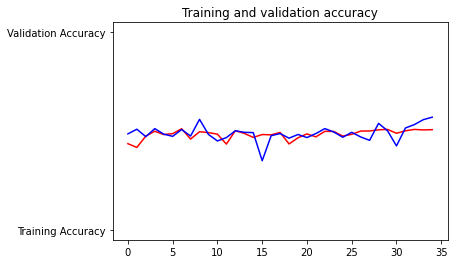

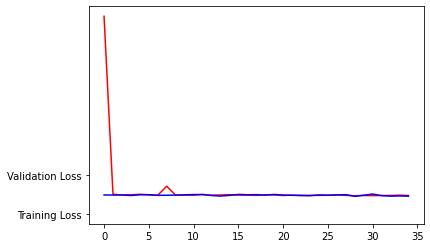

In [29]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) 

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [30]:
def download_history():
  import pickle
  from google.colab import files

  with open('history_initial_training.pkl', 'wb') as f:
    pickle.dump(history.history, f)

  files.download('history_initial_training.pkl')

download_history()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
def download_model():
  import pickle
  from google.colab import files

  with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

  files.download('model.pkl')

download_model()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
# train_datagen = ImageDataGenerator(
#    rotation_range=40,
#    zoom_range=[0.7, 0.9],
#    horizontal_flip=True,
#    rescale=1./255
# )

from PIL import Image
import numpy as np
from skimage import transform



In [33]:
def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (300, 300, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image


In [34]:
!ls

abcd.tar.gz		      Images	 sample_data
history_initial_training.pkl  model.pkl  UTKFace


In [36]:
image = load('1.jpg')
temp = model.predict(image)
print(temp)

1/1 [==============================] - 0s 21ms/step
[[0.37419394 0.39974743 0.18211013 0.06919077]]


In [39]:
actual = np.argmax(temp)
print(actual)
if(actual == 0):
  print("Age: 0-25")
elif(actual == 1):
  print("Age: 26-50")
elif(actual == 2):
  print("Age: 51-75")
else:
  print("Age: 76-100")

1
Age: 26-50


In [ ]:
import cv2
import pickle

In [ ]:
f = open("history_initial_training.pkl", "rb")
object_file = pickle.load(f)

In [ ]:
object_file.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
f = open("model.pkl", "rb")
reopened_model = pickle.load(f)

In [ ]:
reopened_model.predict(image)

1/1 [==============================] - 0s 76ms/step


array([[0.71226734]], dtype=float32)

In [ ]:
vid = cv2.VideoCapture("1.mp4") # For video feed from video 1.mp4
# vid = cv2.VideoCapture(0) # For Webcam Feed
  
while(True):
    ret, frame = vid.read()
    cv2.imshow('frame', frame)
    # image = load(frame)
    temp = reopened_model.predict(frame)
    if temp > 0.7:
      print("male")
    else:
      print("female")
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

vid.release()
cv2.destroyAllWindows()